## Student Performance Indicator

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Feature Engineering
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame


In [4]:

df = pd.read_csv('data/stud.csv')


#### Show Top 5 Records


In [5]:

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the dataset


In [6]:
df.shape

(1000, 8)

### 2.2 Dataset Information
- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading_score
- writing_score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type

### 3.1 Check Missing values

In [7]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [8]:
df.duplicated().sum()

0

#### There are no duplicate  values in the data set

### 3.3 Check data types

In [9]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 4 Exploring Data

### 4.1 Checking the number of unique values of each column


In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 4.2 Check statistics of data set

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

### 4.3 Checking the unique categories for each categorical column

In [12]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


### 4.4 Bucketing numerical and categorical columns separately

In [13]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features),numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features),categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [14]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 4.5 Adding columns for "Total Score" and "Average"

In [15]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


These two derived columns "Total Score" and "Average" can be used as target variables for the machine learning model we are going to build soon

### 4.6 Checking how many students got full marks and how many failed to score minimum marks

In [16]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'No of students with full marks in Reading : {reading_full}')
print(f'No of students with full marks in Writing : {writing_full}')
print(f'No of students with full marks in Maths : {math_full}')

No of students with full marks in Reading : 17
No of students with full marks in Writing : 14
No of students with full marks in Maths : 7


In [17]:
df.shape

(1000, 10)

In [18]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'No of students with less than 20 marks in Reading : {reading_less_20}')
print(f'No of students with less than 20 marks in Writing : {writing_less_20}')
print(f'No of students with less than 20 marks in Maths : {math_less_20}')

No of students with less than 20 marks in Reading : 1
No of students with less than 20 marks in Writing : 3
No of students with less than 20 marks in Maths : 4


#### Insights

- Students have performed best in the reading section and have performed worst in the Maths section

### 4.7 Exploring Data using visuals

#### 4.7.1 Gender

##### Univariate Analysis



---- How is distribution of Gender ?

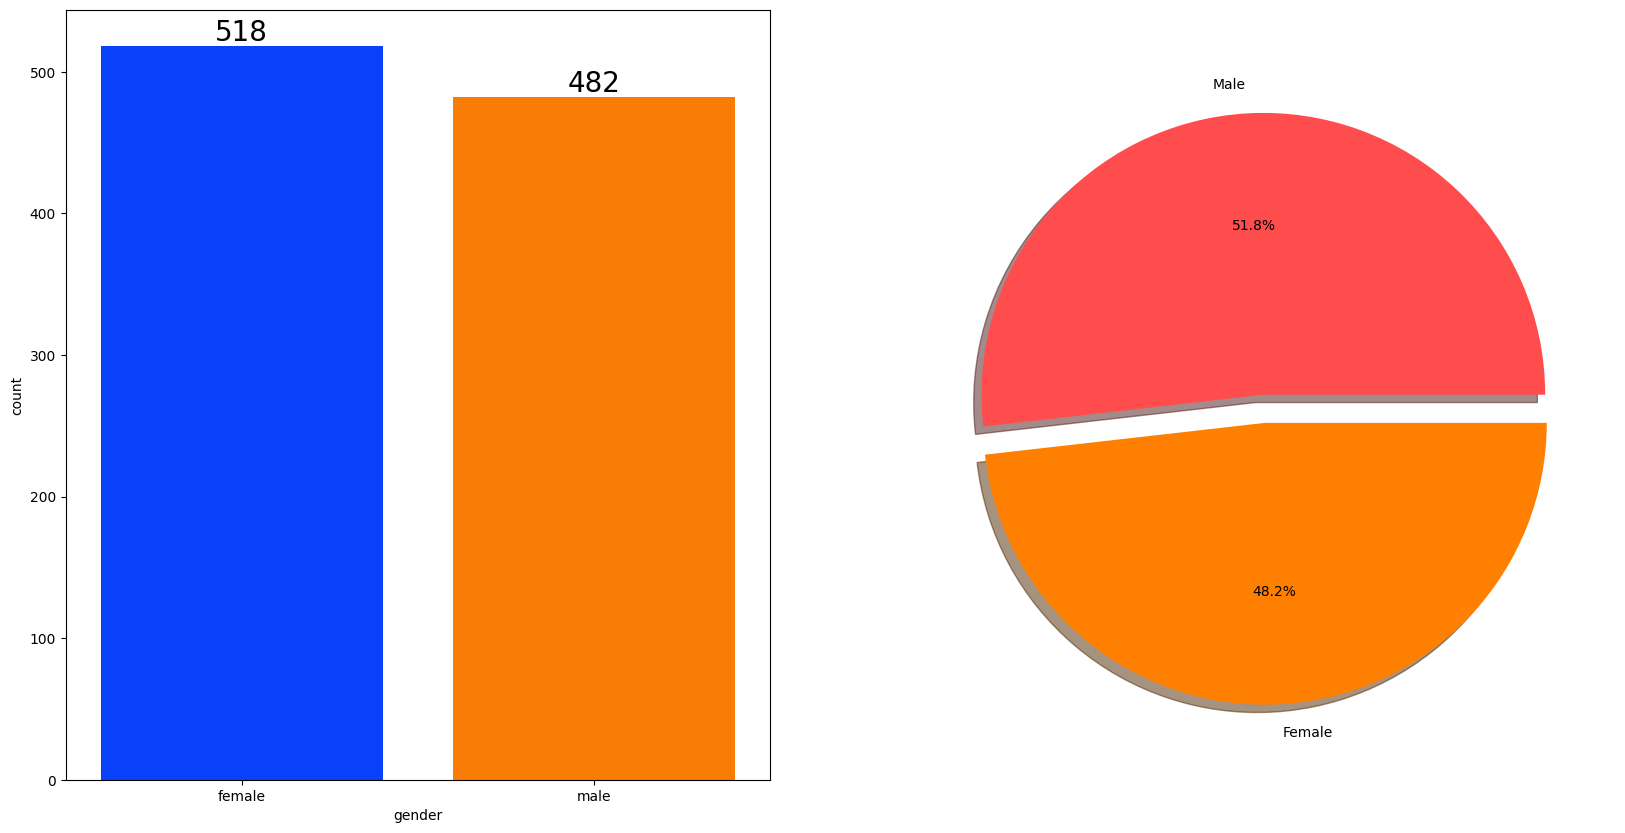

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

##### BIVARIATE ANALYSIS


---- Checking how gender is associated with average score

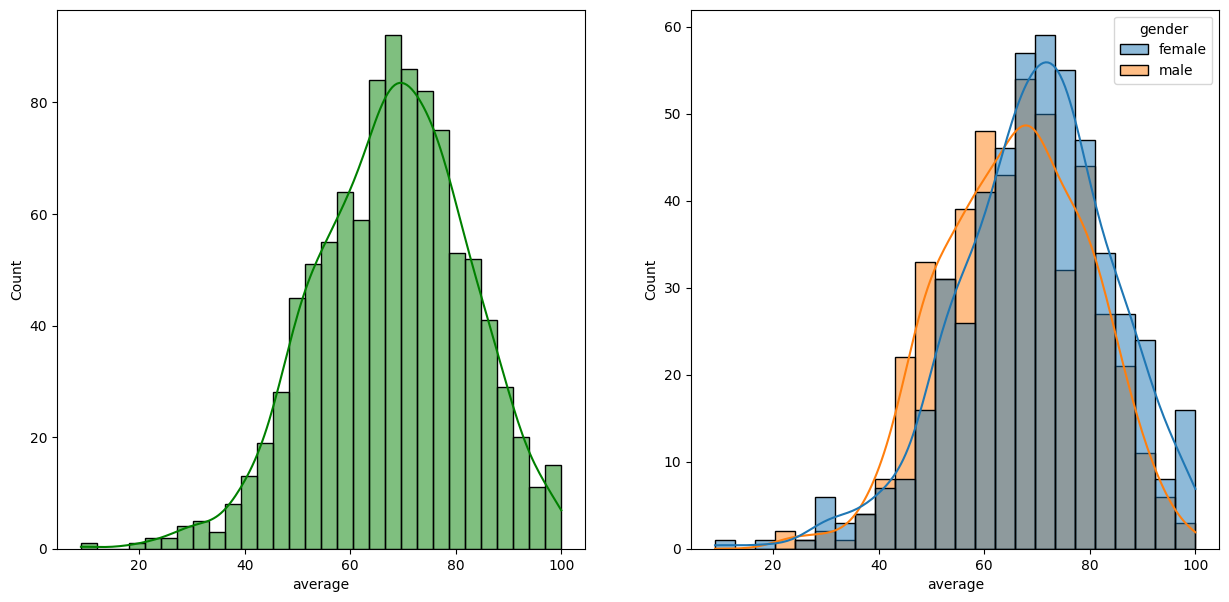

In [19]:
fig,axes = plt.subplots(1,2,figsize =(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g') ## once bin has been set as an argument once in histplot function, it doesn't need to be set again explicitly.
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

---- Checking how gender is associated with total score

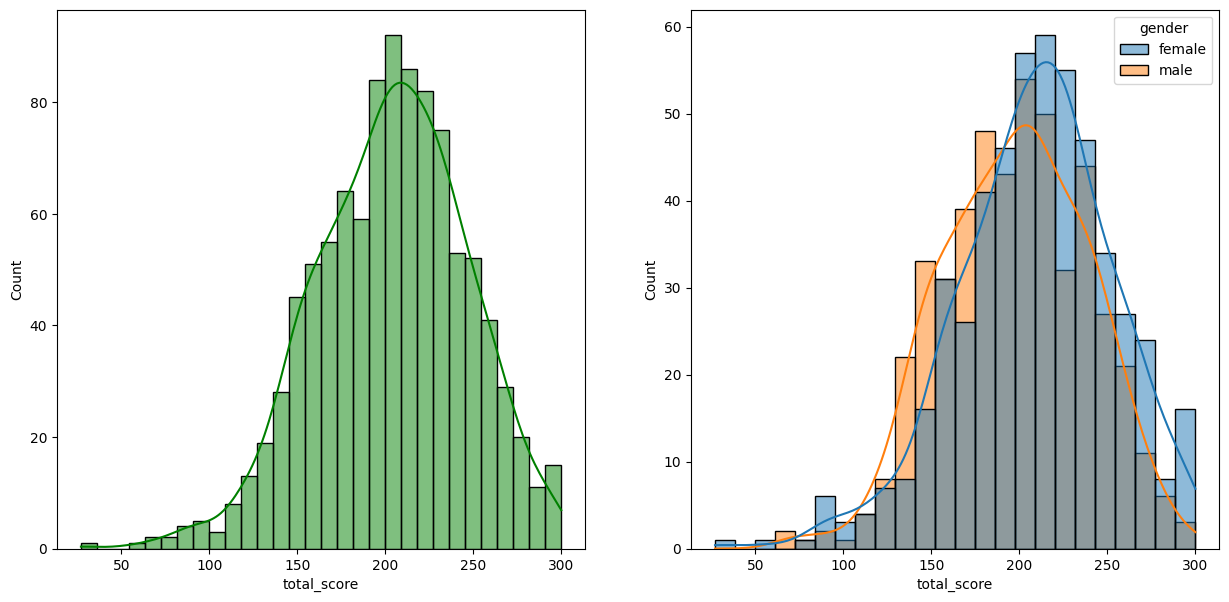

In [20]:
fig,axes = plt.subplots(1,2,figsize =(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

#####  Insights
- Female students tend to perform better then male students.


---- Does gender have any impact on student's performance in specific subjects ?

In [22]:
gender_group = df.groupby('gender')

In [23]:
genderwise_average_score = df.groupby("gender")["average"].mean()
genderwise_average_score

gender
female    69.569498
male      65.837483
Name: average, dtype: float64

In [24]:
genderwise_math_score = df.groupby("gender")["math_score"].mean()
genderwise_math_score

gender
female    63.633205
male      68.728216
Name: math_score, dtype: float64

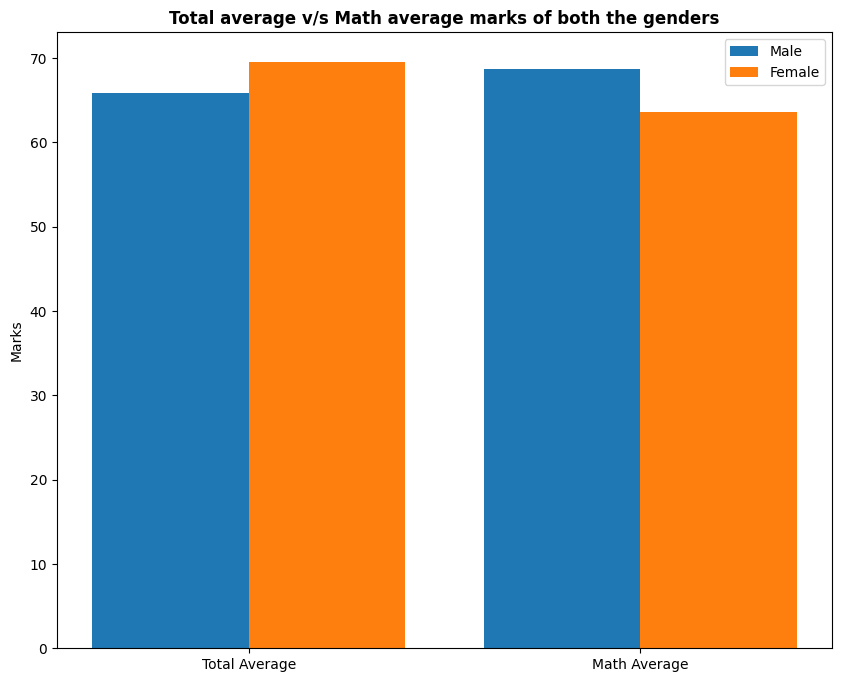

In [25]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [genderwise_average_score[0], genderwise_math_score[0]]
male_scores = [genderwise_average_score[1], genderwise_math_score[1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights 
- On an average females have a better average score than men.
- However, males have scored higher in Maths.

#### 4.7.2 Lunch

##### Univariate Analysis

---- Which type of lunch is most common amoung students ?

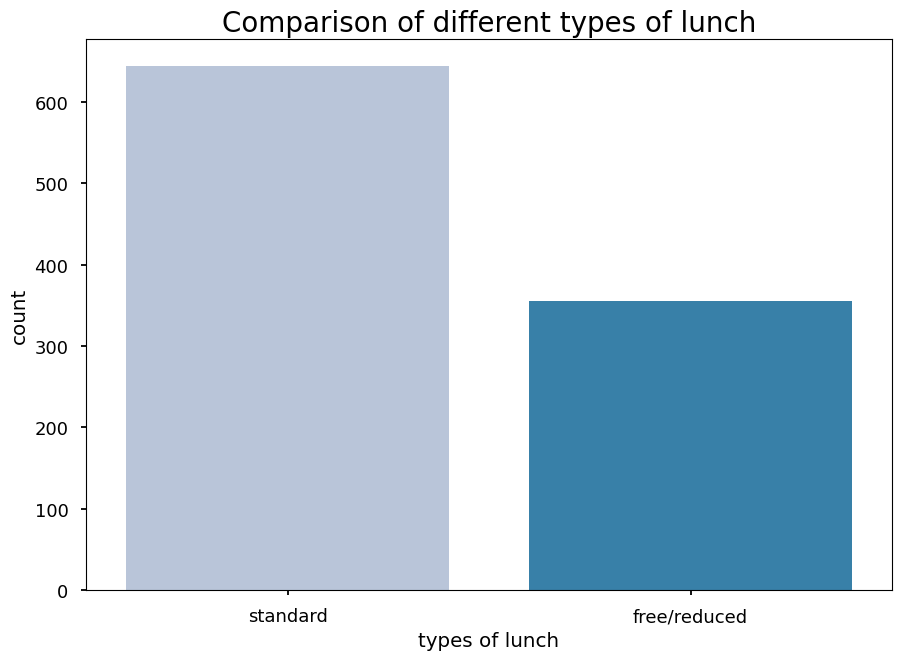

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(data = df, x=df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

#### Insights 
- Students being served Standard lunch was more than free lunch

##### BIVARIATE ANALYSIS


---- Checking how lunch is associated with average score

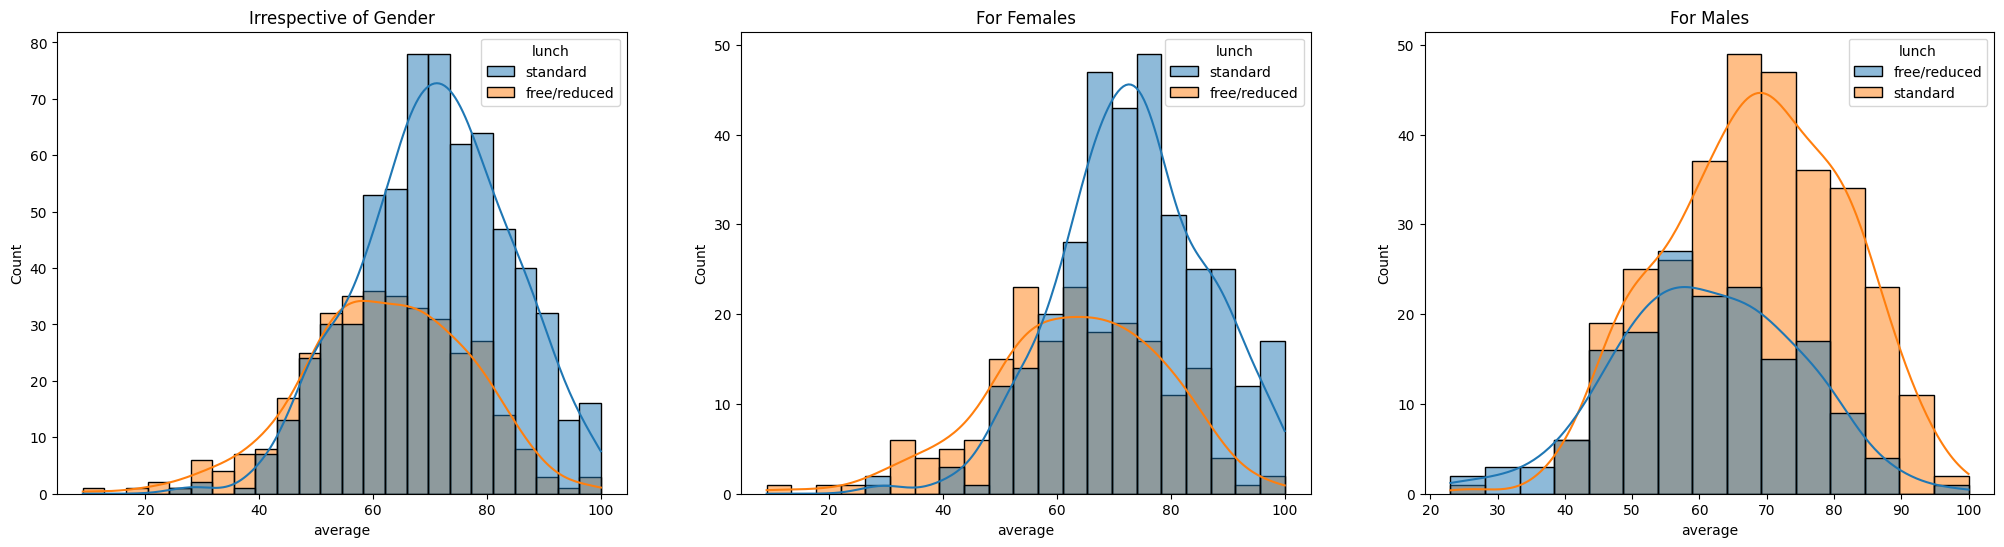

In [26]:
fig,axes = plt.subplots(1,3,figsize =(25,6))
ax1 = plt.subplot(131)
ax1.set_title("Irrespective of Gender")
sns.histplot(data=df,x='average',kde=True,hue='lunch') 
ax2 = plt.subplot(132)
ax2.set_title("For Females")
sns.histplot(data=df[df['gender']=='female'],x='average',kde=True,hue='lunch')
ax3 = plt.subplot(133)
ax3.set_title("For Males")
sns.histplot(data=df[df['gender']=='male'],x='average',kde=True,hue='lunch')
plt.show()

#####  Insights
- Standard lunch helps students perform well in exams.
- Standard lunch helps students perform well in exams irrespective of their gender.


---- Does lunch has any impact on student's performance across tests for different subjects?

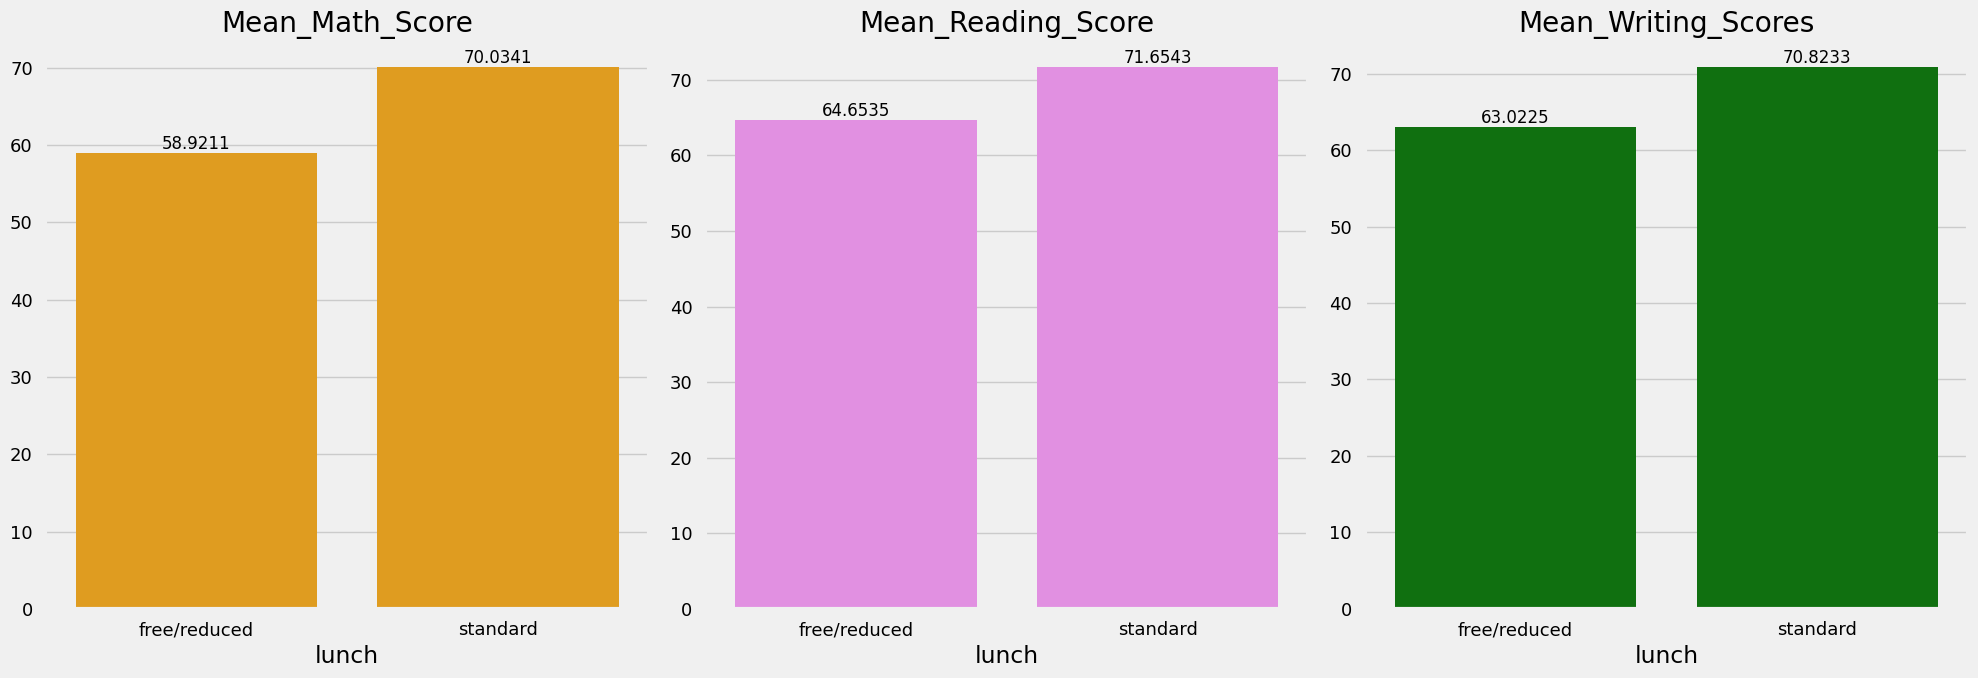

In [91]:
lunch_group = df.groupby('lunch')
fig, ax = plt.subplots(1,3,figsize=(20,7))

sns.barplot(y=lunch_group['math_score'].mean().values,data=df,color='orange',x=lunch_group['math_score'].mean().index,linewidth=3,ax=ax[0])
ax[0].set_title("Mean_Math_Score")
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=12)

sns.barplot(y=lunch_group['reading_score'].mean().values,data=df,color='violet',x=lunch_group['reading_score'].mean().index,linewidth=3,ax=ax[1])
ax[1].set_title("Mean_Reading_Score")
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=12)

sns.barplot(y=lunch_group['writing_score'].mean().values,data=df,color='green',x=lunch_group['math_score'].mean().index,linewidth=3,ax=ax[2])
ax[2].set_title("Mean_Writing_Scores")
for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=12)

plt.tight_layout()
plt.show()

#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.7.3 Race / Ethnicity

##### Univariate Analysis

---- How is Group wise distribution ?

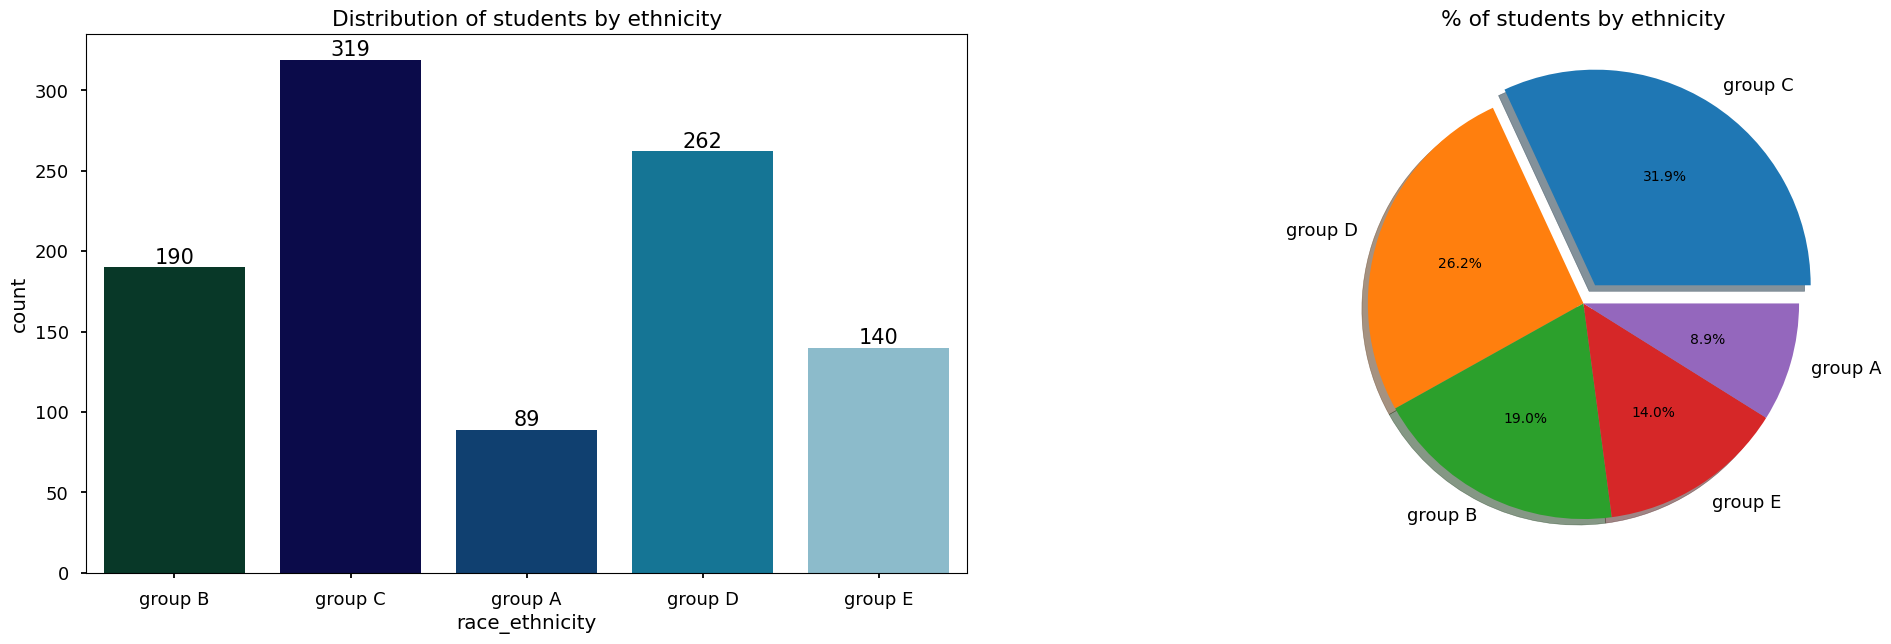

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(25,7))
ax1=plt.subplot(121)
ax1.set_title("Distribution of students by ethnicity")
sns.countplot(data=df, x=df['race_ethnicity'],palette='ocean')
for container in ax1.containers:
    ax1.bar_label(container,color='black',size=15)

ax2=plt.subplot(122)
ax2.set_title("% of students by ethnicity")
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

##### BIVARIATE ANALYSIS


---- Checking how race_ethnicity level is associated with average score

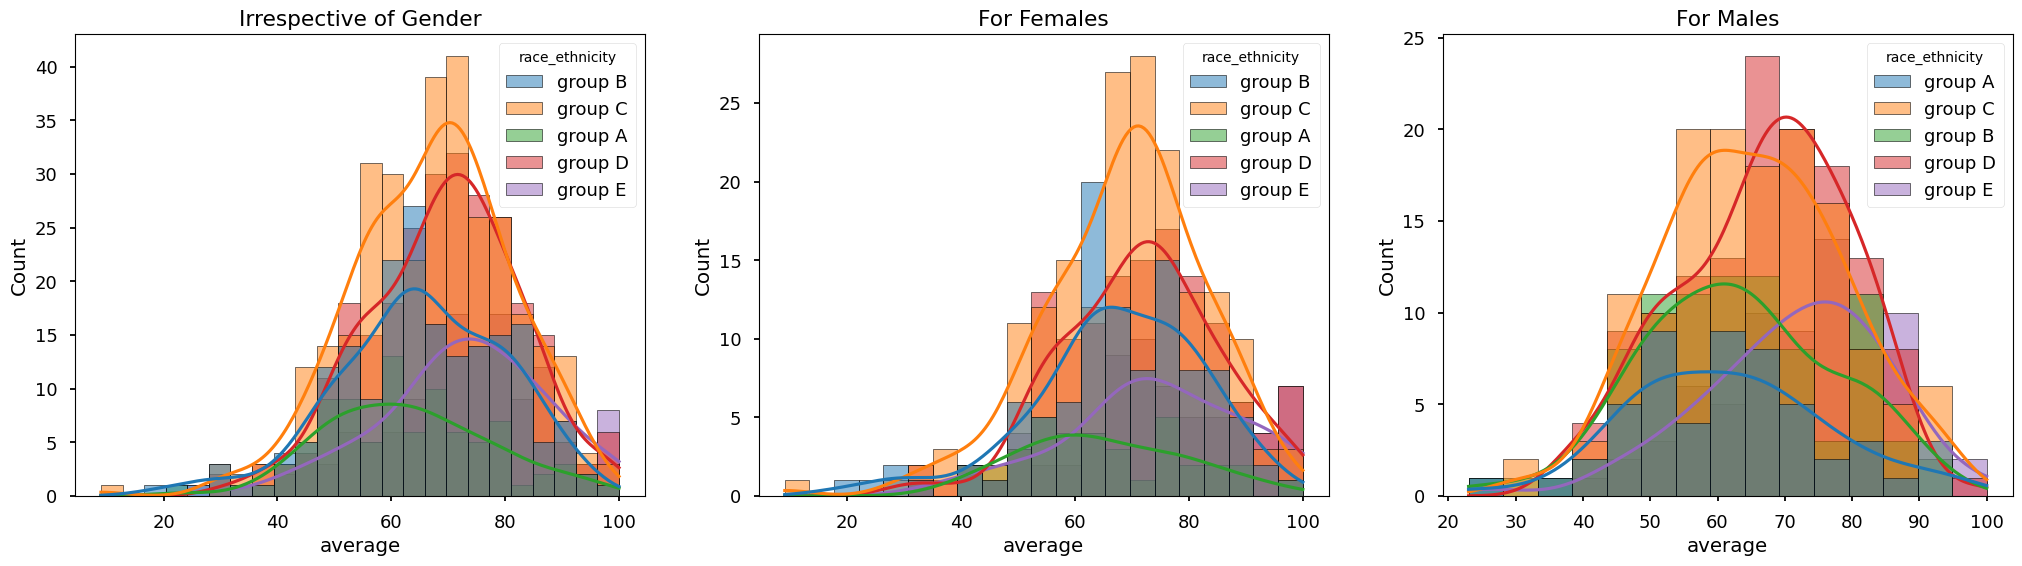

In [29]:
fig,axes = plt.subplots(1,3,figsize =(25,6))
ax1 = plt.subplot(131)
ax1.set_title("Irrespective of Gender")
sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity') 
ax2 = plt.subplot(132)
ax2.set_title("For Females")
sns.histplot(data=df[df['gender']=='female'],x='average',kde=True,hue='race_ethnicity')
ax3 = plt.subplot(133)
ax3.set_title("For Males")
sns.histplot(data=df[df['gender']=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

Insights

- Students belonging to ethnic Groups A  & B tend to perform poorly in exams
- Students belonging to ethnic Groups A  & B tend to perform poorly in exams irrespective of their gender
- Students belonging to ethnic Groups C  tend to perform well in exams and their performance is better in females when compared to that in males


---- Does race/ethnicity has any impact on student's performance across tests for different subjects?

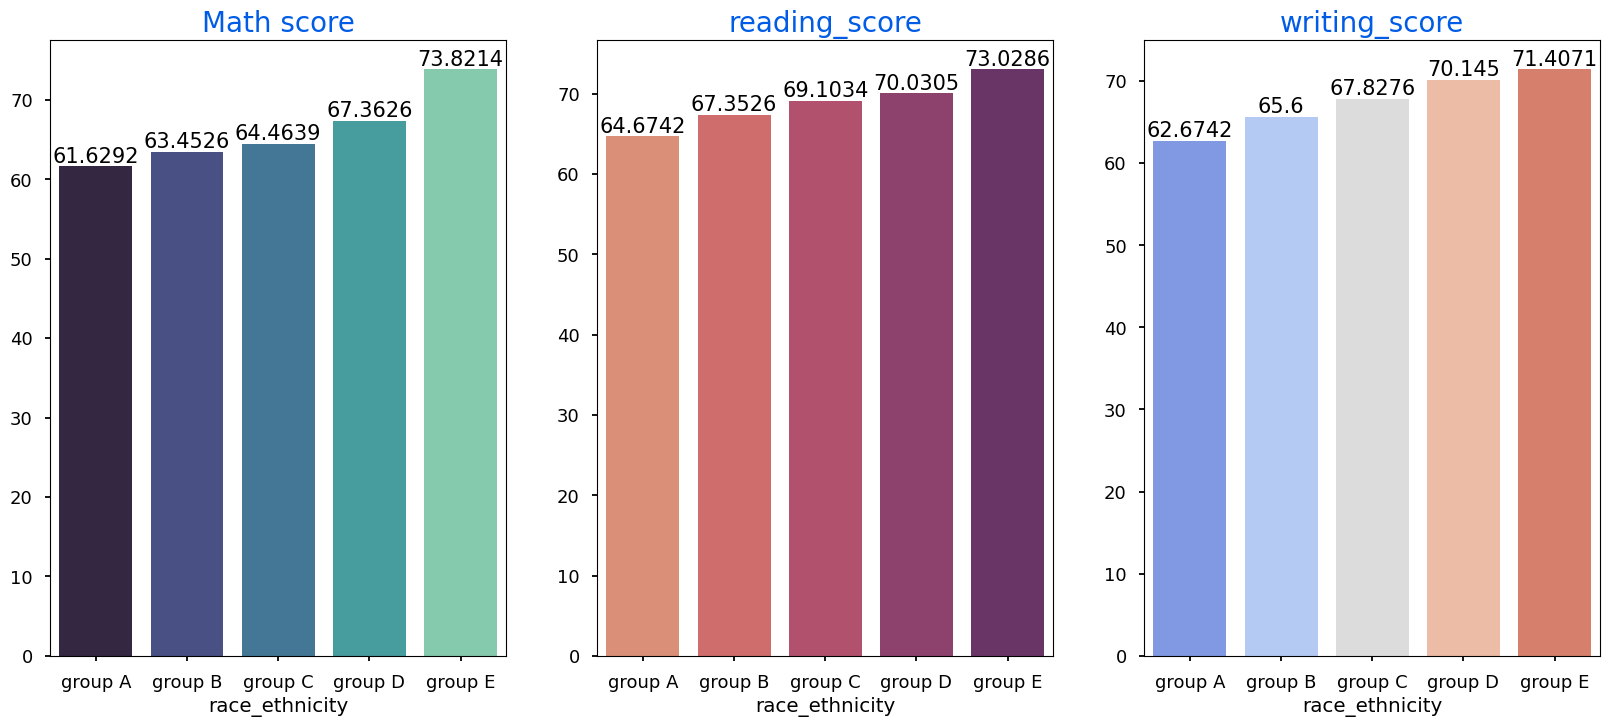

In [30]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('reading_score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('writing_score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.7.4 Parental Level of Education

##### Univariate Analysis



---- How is the distribution of educational level of students' parents ?

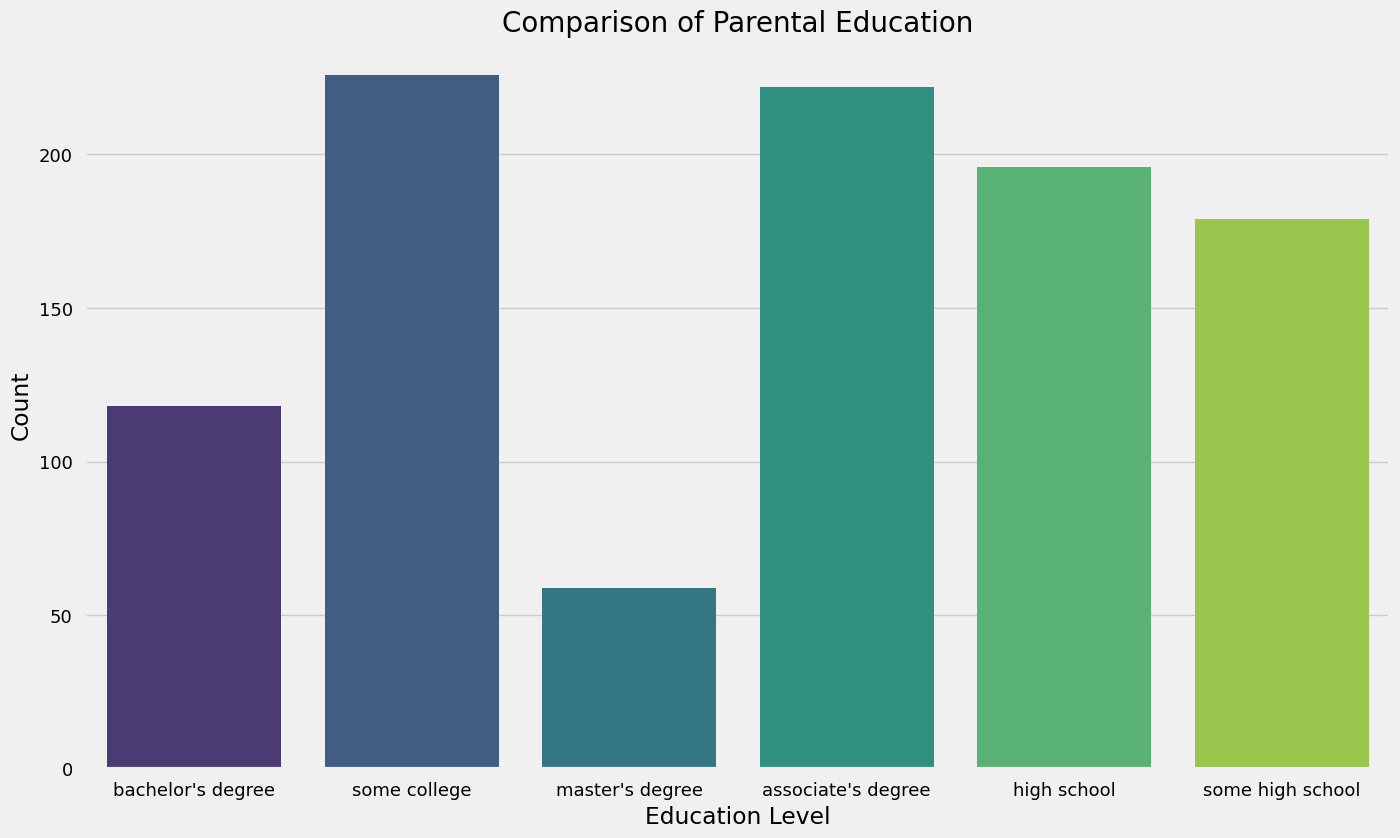

In [53]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(data=df,x=df['parental_level_of_education'],palette='viridis')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.show()

#### Insights 
- Largest number of parents are from some college.

##### BIVARIATE ANALYSIS


----Checking how education level of parents  is associated with average score

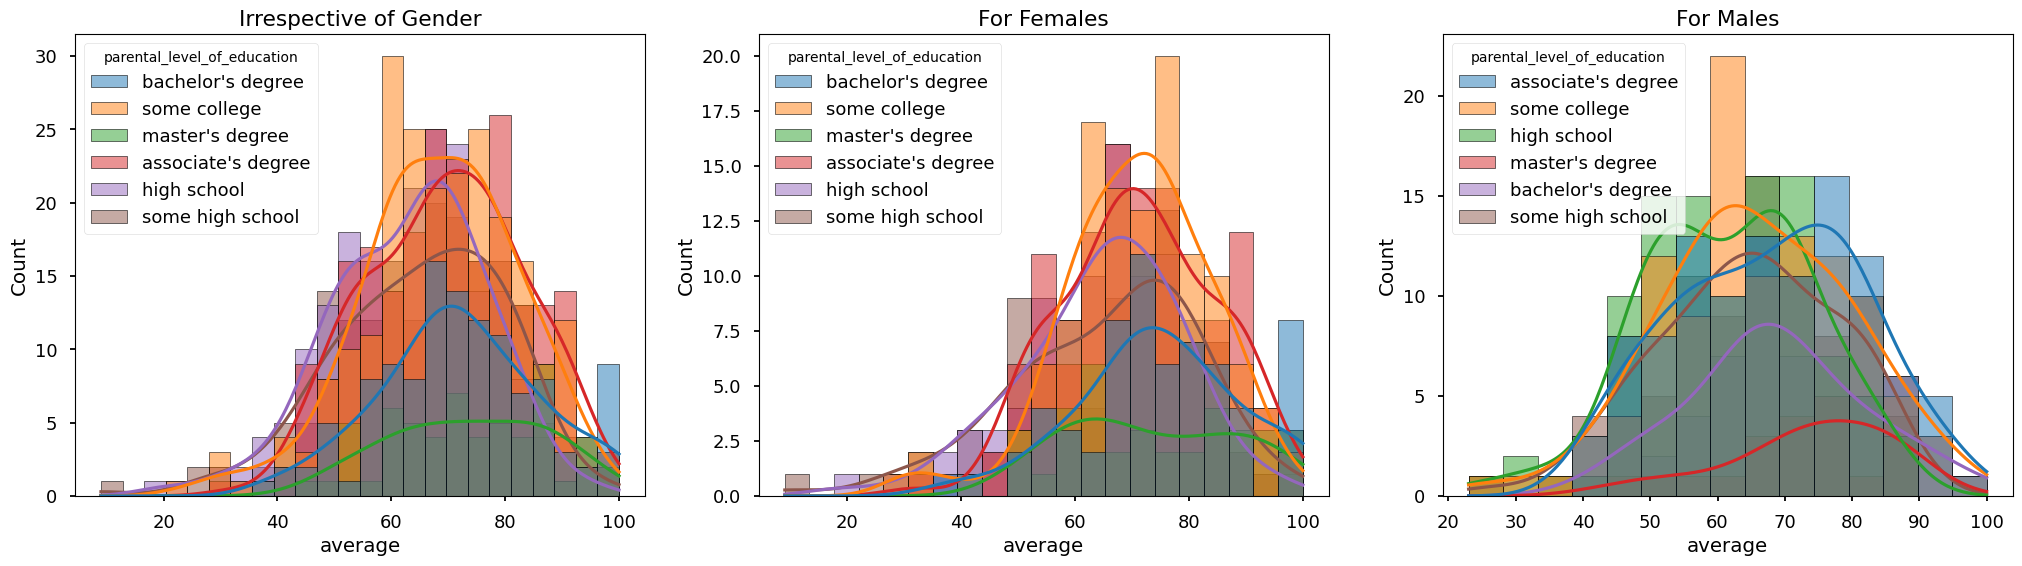

In [31]:
fig,axes = plt.subplots(1,3,figsize =(25,6))
ax1 = plt.subplot(131)
ax1.set_title("Irrespective of Gender")
sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education') 
ax2 = plt.subplot(132)
ax2.set_title("For Females")
sns.histplot(data=df[df['gender']=='female'],x='average',kde=True,hue='parental_level_of_education')
ax3 = plt.subplot(133)
ax3.set_title("For Males")
sns.histplot(data=df[df['gender']=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

Insights

- In general, there doesn't seem to be a strong relation between parents' level of education and average score
- As per the 2nd plot, there doesn't seem to be any relation between female students and their parents' level of education
- As per the 3rd plot, it seems that male students tend to perform better if parents' had an associate's or a masters degree.



---- Does parental level of education has any impact on student's performance across tests for different subjects?

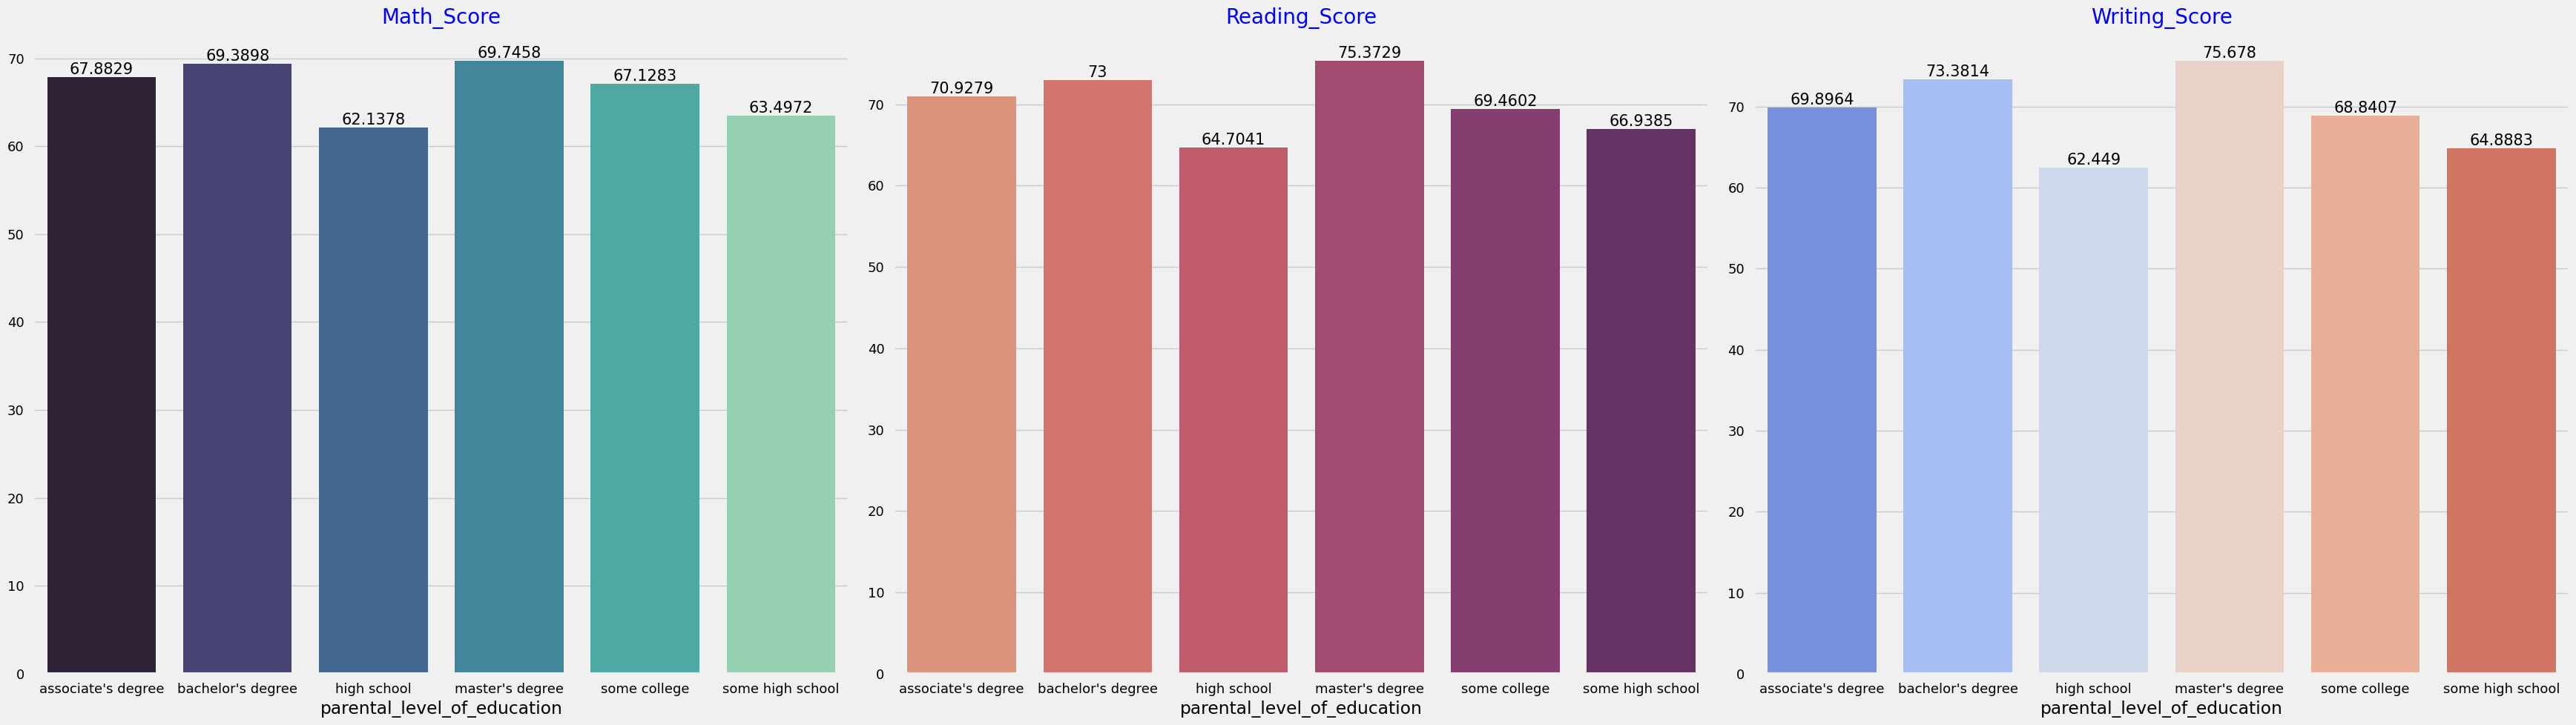

In [78]:
preparation_group = df.groupby('parental_level_of_education')
fig,ax = plt.subplots(1,3,figsize=(35,10))

sns.barplot(x=preparation_group['math_score'].mean().index,y=preparation_group['math_score'].mean().values,palette='mako',ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)
ax[0].set_title("Math_Score",color='blue',size=20)

sns.barplot(x=preparation_group['reading_score'].mean().index,y=preparation_group['reading_score'].mean().values,palette='flare',ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)
ax[1].set_title("Reading_Score",color='blue',size=20)

sns.barplot(x=preparation_group['writing_score'].mean().index,y=preparation_group['writing_score'].mean().values,palette='coolwarm',ax=ax[2])
for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)
ax[2].set_title("Writing_Score",color='blue',size=20)

plt.tight_layout()
plt.show()

#### Insights 
- The score of students whose parents possess bachelor or master level education are higher than others.

#### 4.7.5 Preparation for course test

##### Univariate Analysis



---- How many students prepared for the course test vs how many did not ?

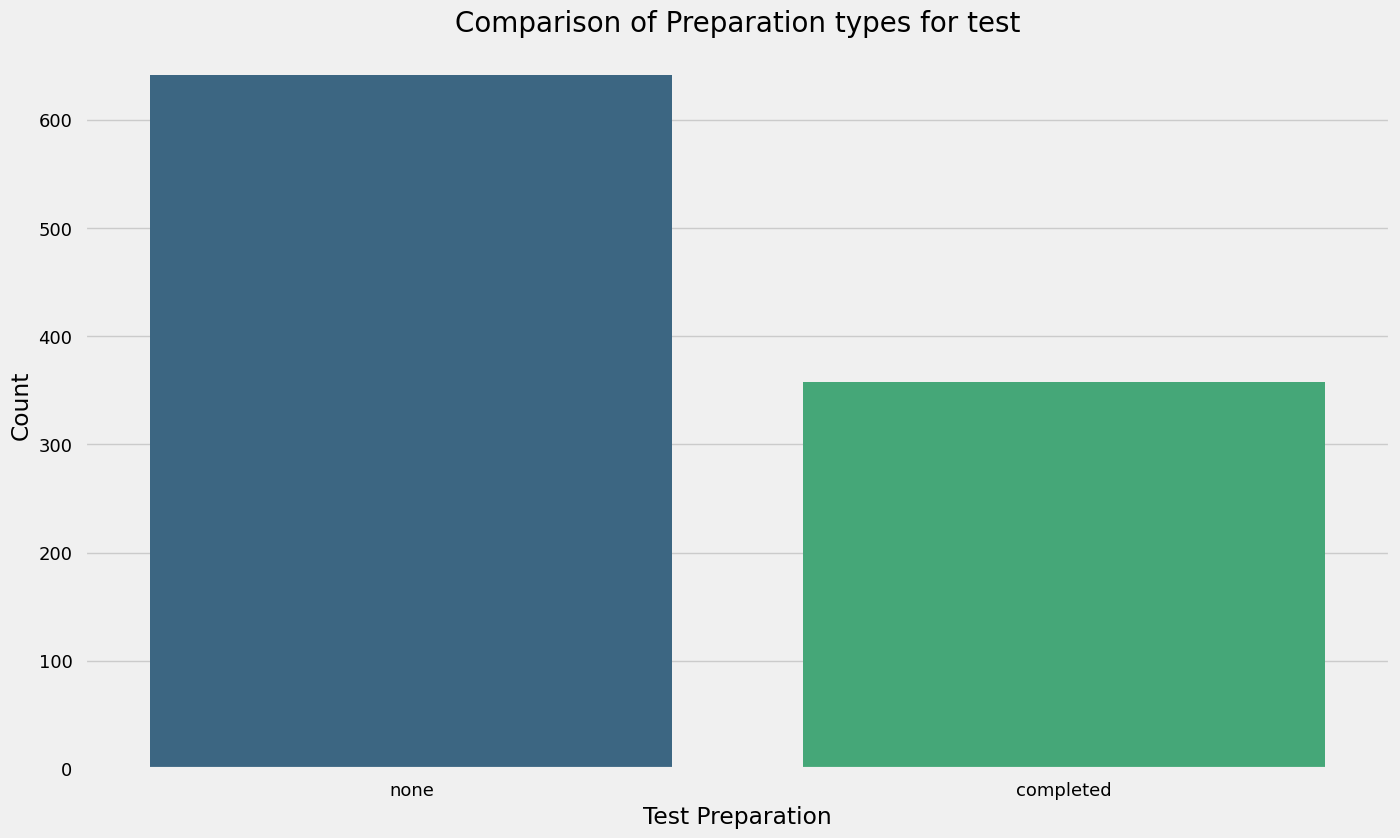

In [80]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(data=df,x=df['test_preparation_course'],palette='viridis')
plt.title('Comparison of Preparation types for test', fontweight = 30, fontsize = 20)
plt.xlabel("Test Preparation")
plt.ylabel("Count")
plt.show()

#### Insights

- Most students did not prepare for the test.



##### BIVARIATE ANALYSIS


----Checking how type of test preparation  is associated with average score

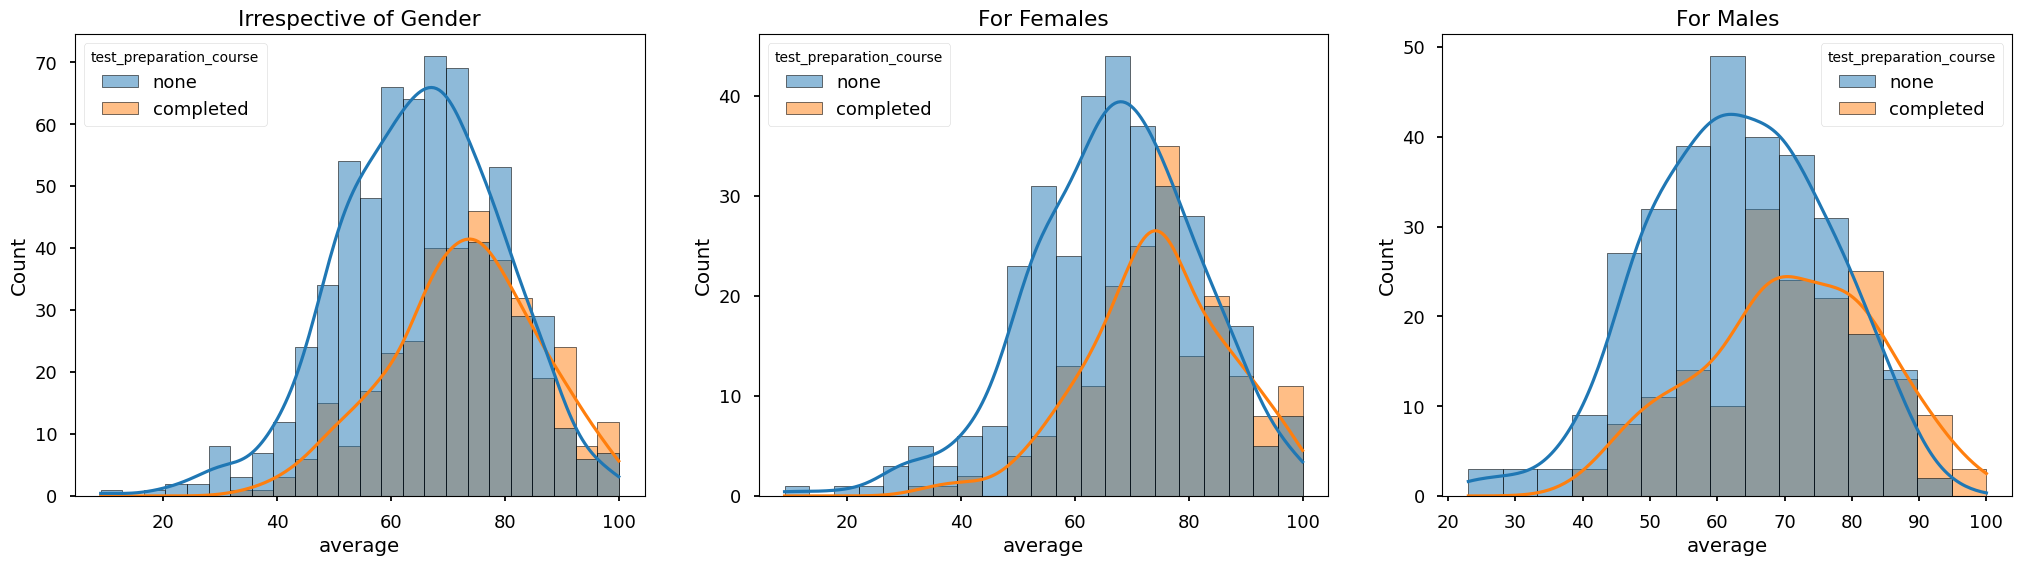

In [32]:
fig,axes = plt.subplots(1,3,figsize =(25,6))
ax1 = plt.subplot(131)
ax1.set_title("Irrespective of Gender")
sns.histplot(data=df,x='average',kde=True,hue='test_preparation_course') 
ax2 = plt.subplot(132)
ax2.set_title("For Females")
sns.histplot(data=df[df['gender']=='female'],x='average',kde=True,hue='test_preparation_course')
ax3 = plt.subplot(133)
ax3.set_title("For Males")
sns.histplot(data=df[df['gender']=='male'],x='average',kde=True,hue='test_preparation_course')
plt.show()

Insights

- This might not not be an insight as it's kind of obvious - we can see that both genders seem to fare better in the test when they were prepared in comparsion to when they were not.




---- Does test preparation have any impact on student's performance across tests for different subjects?

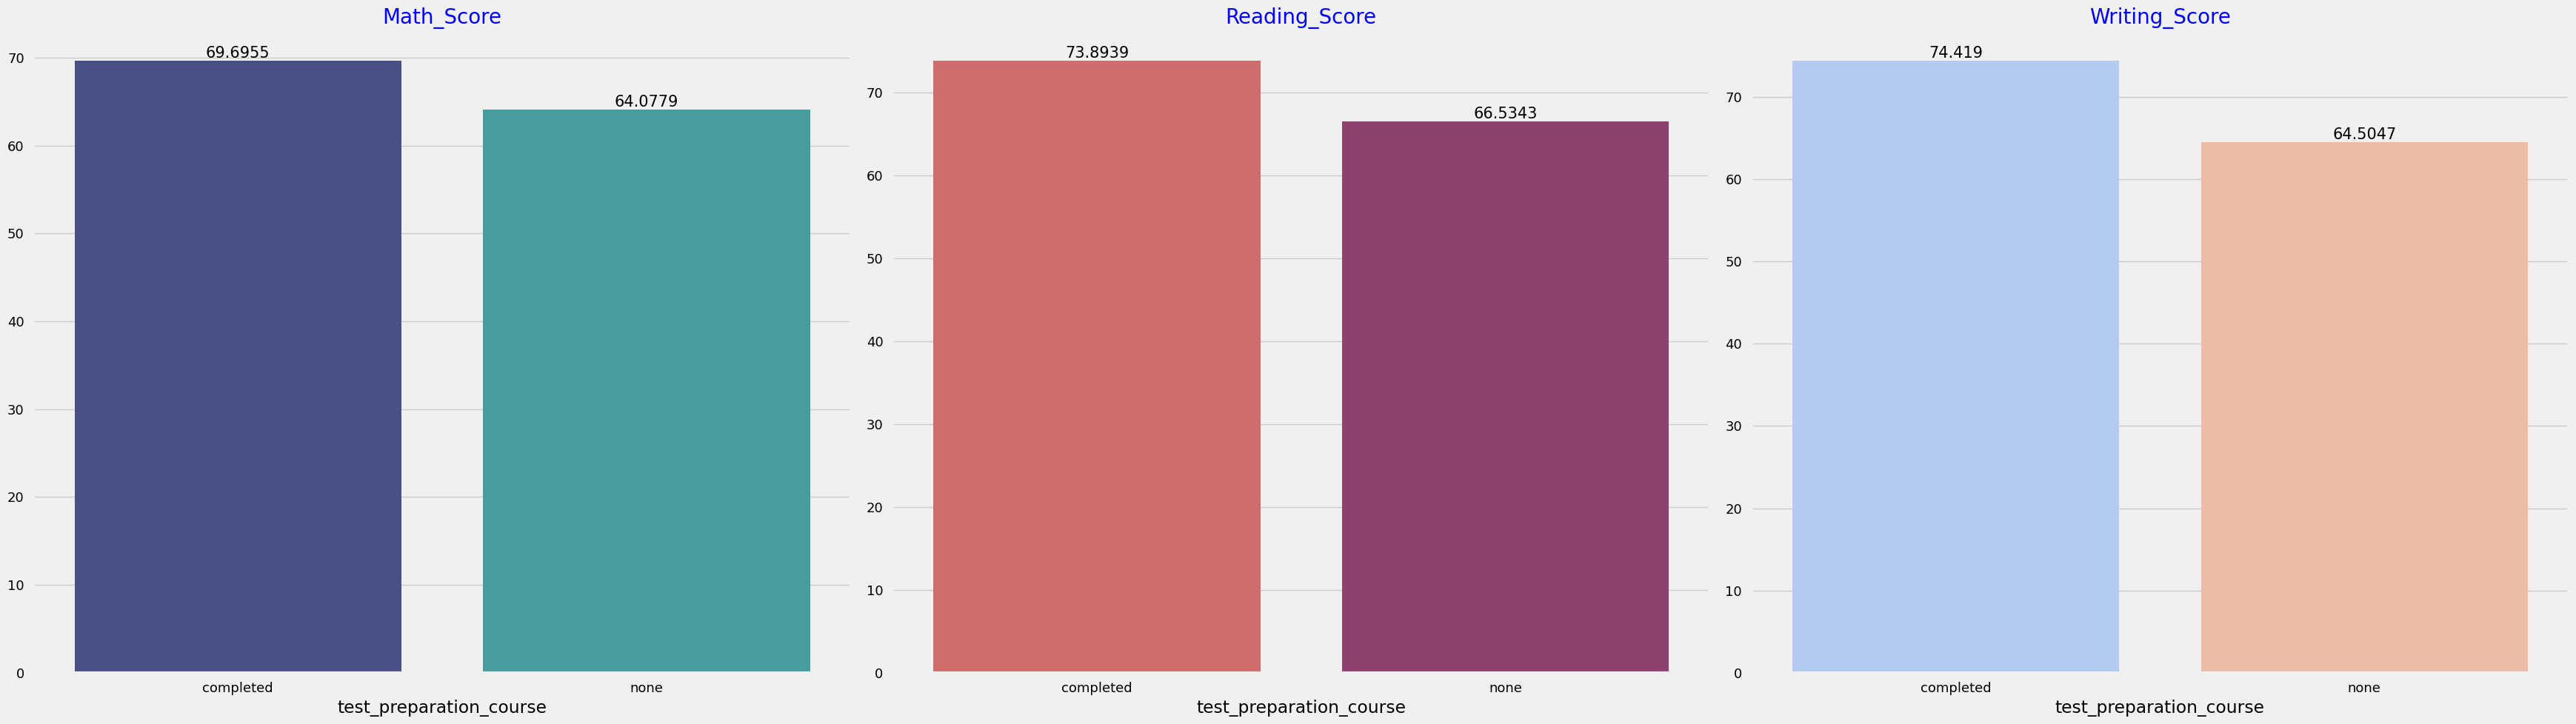

In [94]:
preparation_group = df.groupby('test_preparation_course')
fig,ax = plt.subplots(1,3,figsize=(35,10))

sns.barplot(x=preparation_group['math_score'].mean().index,y=preparation_group['math_score'].mean().values,palette='mako',ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)
ax[0].set_title("Math_Score",color='blue',size=20)

sns.barplot(x=preparation_group['reading_score'].mean().index,y=preparation_group['reading_score'].mean().values,palette='flare',ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)
ax[1].set_title("Reading_Score",color='blue',size=20)

sns.barplot(x=preparation_group['writing_score'].mean().index,y=preparation_group['writing_score'].mean().values,palette='coolwarm',ax=ax[2])
for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)
ax[2].set_title("Writing_Score",color='blue',size=20)

plt.tight_layout()
plt.show()

#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.7.6 Maximumum score of students in all three subjects

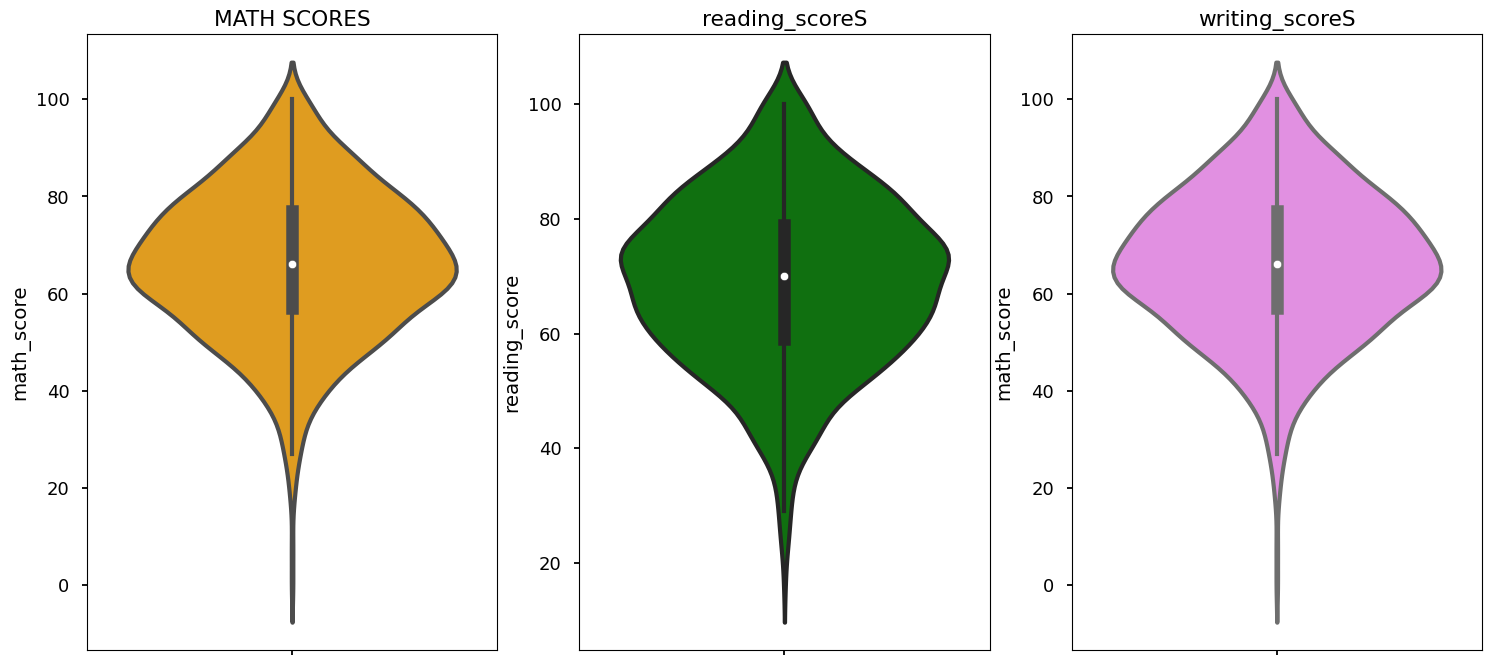

In [33]:

plt.figure(figsize=(18,8))
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='orange',linewidth=3)
plt.subplot(1, 3, 2)
plt.title('reading_scoreS')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 3, 3)
plt.title('writing_scoreS')
sns.violinplot(y='math_score',data=df,color='violet',linewidth=3)
plt.show()

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80 (wider horizontal spread of leaf in fiures 2 & 3)

#### 4.7.8 CHECKING OUTLIERS

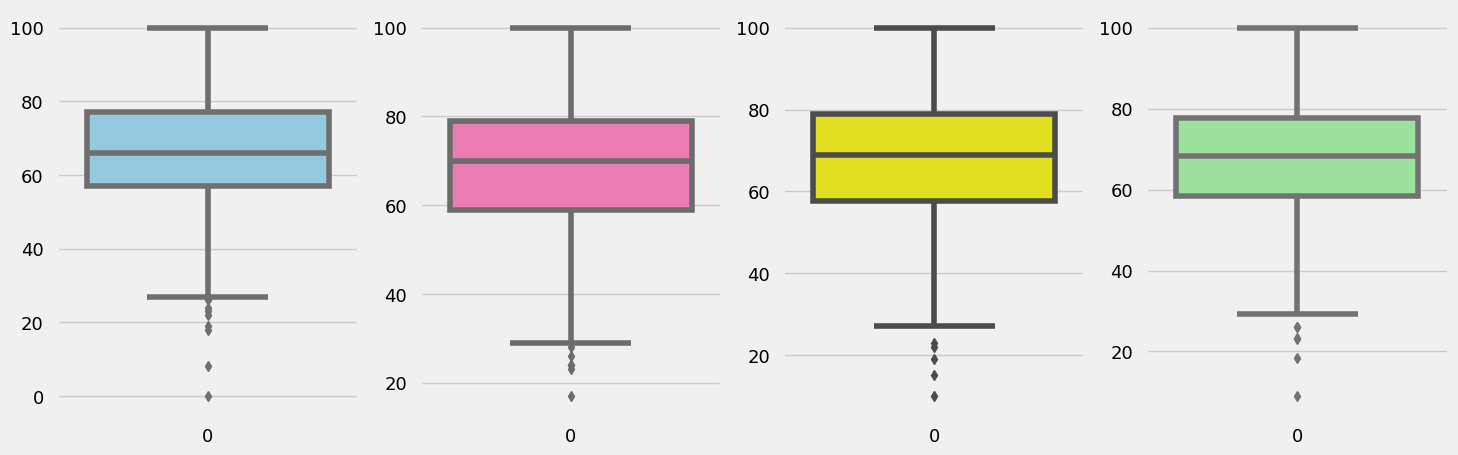

In [96]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### 4.7.9 MUTIVARIATE ANALYSIS USING PAIRPLOT

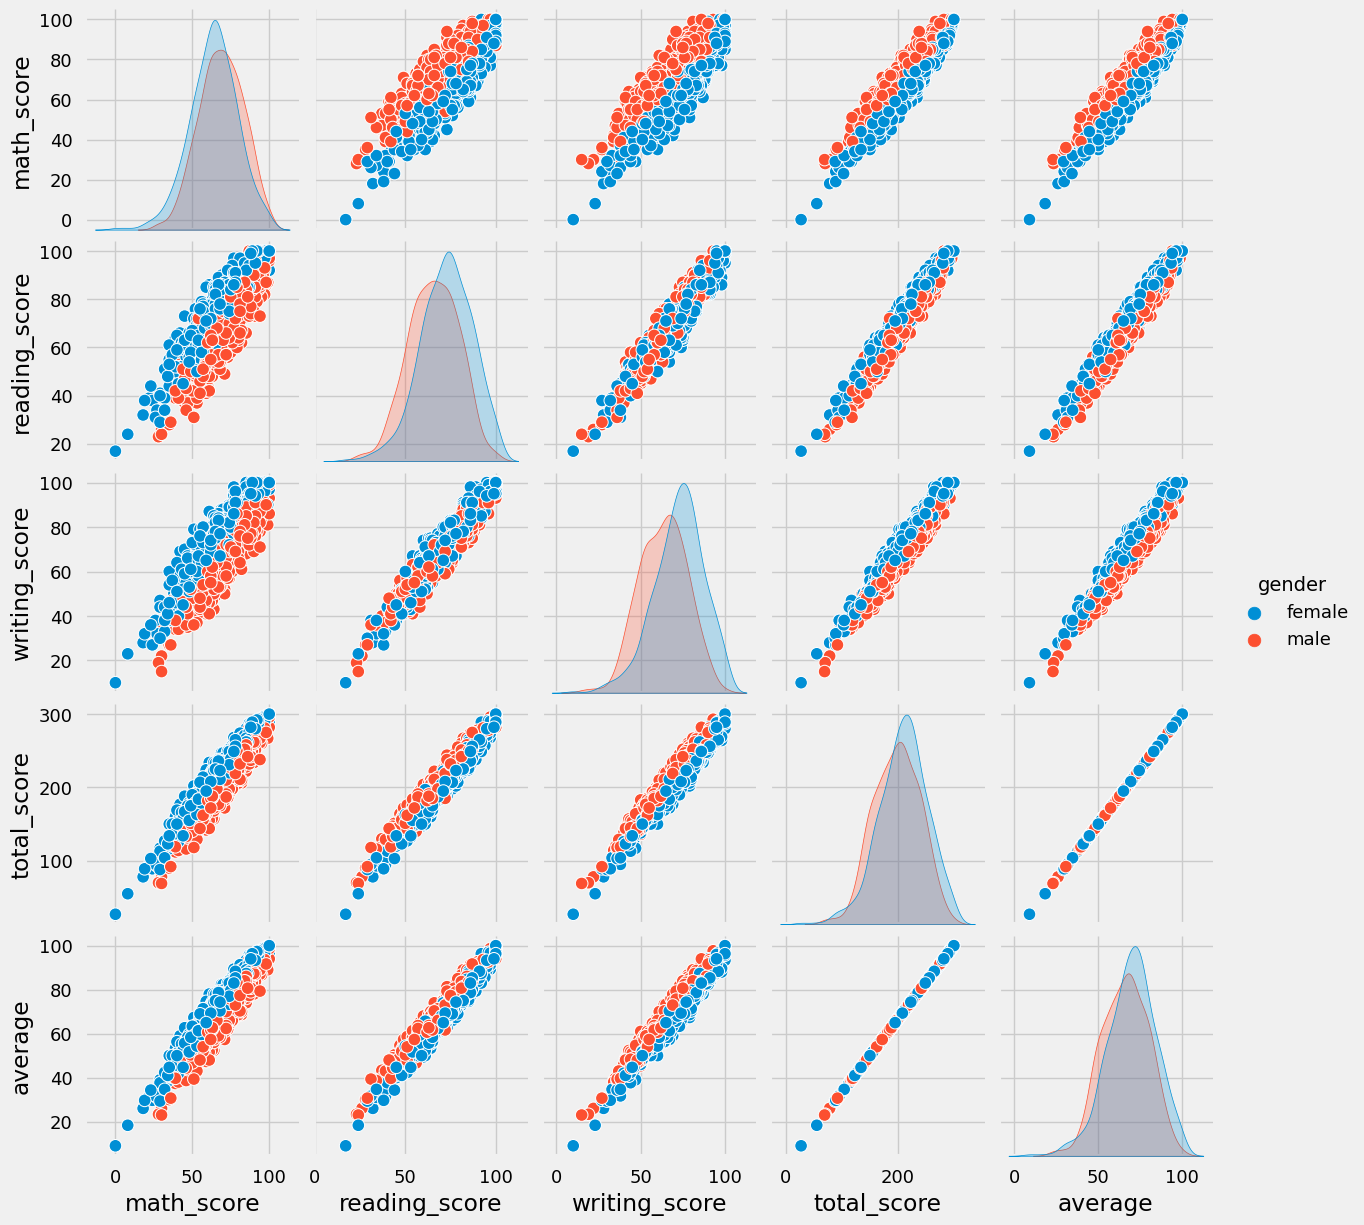

In [97]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

#### 4.7.10 Multivariate analysis using pieplot

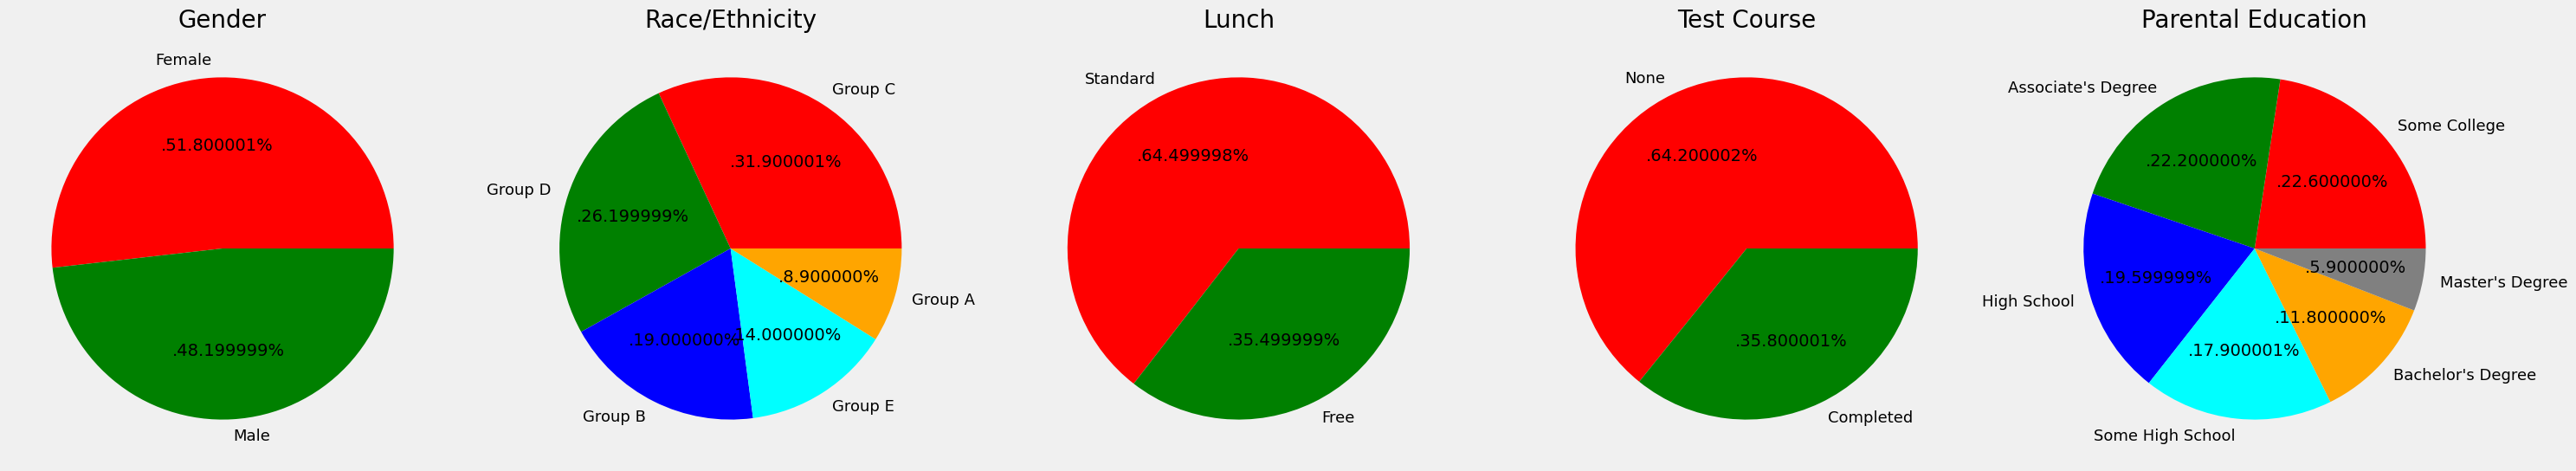

In [98]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.